# Part I - (2019 Ford Go-Bike Project)
## by (Alagbe Oluwapelumi)

## Introduction
> Introduce the dataset

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
import glob

import math
%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
# load in the dataset into a pandas dataframe
bike = pd.read_csv('201902-fordgobike-tripdata.csv')
bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902.0,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535.0,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905.0,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638.0,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898.0,Subscriber,1974.0,Male,Yes


### What is the structure of your dataset?

The dataset contains 180500 observations, and has 16 columns focusing on the bike trip details; the trip duration, start and end times, start and end stations info, and some informations related to the users such as member age, member gender, user type and bike share for all trip  Most of the variables are numerical (9 Variables), 7 object type.


### The main feature(s) of interest in the dataset
   
- I am most interested in what are the characteristics (age, sex, and user_type) of the riders and the duration of the trips in these time points and locations.
- I am also interested in figuring out when and where are most trips started because this dataset includes start time/location and end time/location. I focus on the starting points first.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- User_type either customer or subscriber should have affect on the trip duration.
- Gender and Age of the users should also have affect on the trip duration.
- When are most trips taken in terms of time of day, day of the week?

In [3]:
# high-level overview of data shape and composition
print(bike.shape)

(180500, 16)


In [4]:
print(bike.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180500 entries, 0 to 180499
Data columns (total 16 columns):
duration_sec               180500 non-null int64
start_time                 180500 non-null object
end_time                   180500 non-null object
start_station_id           180304 non-null float64
start_station_name         180304 non-null object
start_station_latitude     180500 non-null float64
start_station_longitude    180500 non-null float64
end_station_id             180304 non-null float64
end_station_name           180304 non-null object
end_station_latitude       180500 non-null float64
end_station_longitude      180500 non-null float64
bike_id                    180499 non-null float64
user_type                  180499 non-null object
member_birth_year          172378 non-null float64
member_gender              172378 non-null object
bike_share_for_all_trip    180499 non-null object
dtypes: float64(8), int64(1), object(7)
memory usage: 22.0+ MB
None


In [5]:
print(bike.describe())

        duration_sec  start_station_id  start_station_latitude  \
count  180500.000000     180304.000000           180500.000000   
mean      727.862388        138.681427               37.771171   
std      1807.078949        111.833107                0.099792   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000000        104.000000               37.780760   
75%       796.000000        239.000000               37.797280   
max     85444.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            180500.000000   180304.000000         180500.000000   
mean               -122.352503      136.552705             37.771333   
std                   0.117292      111.549105              0.099700   
min                -122.453704        3.000000             37.317298   
25%                -122.412408       44.00000

In [6]:
#drop missing rows
bike.dropna(inplace=True)
bike.shape

(172184, 16)

In [7]:
#checking the count of user type
bike.user_type.value_counts()

Subscriber    155838
Customer       16346
Name: user_type, dtype: int64

In [8]:
#checking the count of member gender
bike.member_gender.value_counts()

Male      128461
Female     40128
Other       3595
Name: member_gender, dtype: int64

In [9]:
#checking the duplicate
sum(bike.duplicated())

0

In [10]:
#copying my data
clean_bike = bike.copy()

In [11]:
clean_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172184 entries, 0 to 180498
Data columns (total 16 columns):
duration_sec               172184 non-null int64
start_time                 172184 non-null object
end_time                   172184 non-null object
start_station_id           172184 non-null float64
start_station_name         172184 non-null object
start_station_latitude     172184 non-null float64
start_station_longitude    172184 non-null float64
end_station_id             172184 non-null float64
end_station_name           172184 non-null object
end_station_latitude       172184 non-null float64
end_station_longitude      172184 non-null float64
bike_id                    172184 non-null float64
user_type                  172184 non-null object
member_birth_year          172184 non-null float64
member_gender              172184 non-null object
bike_share_for_all_trip    172184 non-null object
dtypes: float64(8), int64(1), object(7)
memory usage: 22.3+ MB


### Define

Delete unnecessary columns

### Code

In [12]:
clean_bike.drop(['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis=1, inplace = True)

### Test

In [13]:
clean_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172184 entries, 0 to 180498
Data columns (total 12 columns):
duration_sec               172184 non-null int64
start_time                 172184 non-null object
end_time                   172184 non-null object
start_station_id           172184 non-null float64
start_station_name         172184 non-null object
end_station_id             172184 non-null float64
end_station_name           172184 non-null object
bike_id                    172184 non-null float64
user_type                  172184 non-null object
member_birth_year          172184 non-null float64
member_gender              172184 non-null object
bike_share_for_all_trip    172184 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 17.1+ MB


### Define

Add other columns containing duration in minutes, hours and days.

### Code

In [14]:
clean_bike.insert(1, 'duration_minutes', clean_bike.duration_sec/60)
clean_bike.insert(2, 'duration_hours', clean_bike.duration_sec/3600)
clean_bike.insert(3, 'duration_days', clean_bike.duration_hours/24)

### Test

In [15]:
clean_bike.head(10)

,duration_sec,duration_minutes,duration_hours,duration_days,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,869.750000,14.495833,0.603993,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902.0,Customer,1984.0,Male,No
2,61854,1030.900000,17.181667,0.715903,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905.0,Customer,1972.0,Male,No
3,36490,608.166667,10.136111,0.422338,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638.0,Subscriber,1989.0,Other,No
4,1585,26.416667,0.440278,0.018345,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898.0,Subscriber,1974.0,Male,Yes
5,1793,29.883333,0.498056,0.020752,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200.0,Subscriber,1959.0,Male,No
6,1147,19.116667,0.318611,0.013275,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,312.0,San Jose Diridon Station,3803.0,Subscriber,1983.0,Female,No
7,1615,26.916667,0.448611,0.018692,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,127.0,Valencia St at 21st St,6329.0,Subscriber,1989.0,Male,No
8,1570,26.166667,0.436111,0.018171,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,127.0,Valencia St at 21st St,6548.0,Subscriber,1988.0,Other,No
9,1049,17.483333,0.291389,0.012141,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,121.0,Mission Playground,6488.0,Subscriber,1992.0,Male,No
10,458,7.633333,0.127222,0.005301,2019-02-28 23:57:57.2110,2019-03-01 00:05:35.4350,370.0,Jones St at Post St,43.0,San Francisco Public Library (Grove St at Hyde...,5318.0,Subscriber,1996.0,Female,Yes


### Define

Add 2 other columns(start_day, end_day) containing day name obtained from start_time and end_time after converting data type to date time 

### Code

In [16]:
clean_bike[['start_time', 'end_time']] = clean_bike[['start_time', "end_time"]].apply(pd.to_datetime)

In [17]:
clean_bike.insert(4, 'start_day', clean_bike['start_time'].dt.day_name())
clean_bike.insert(5, 'end_day', clean_bike['end_time'].dt.day_name())

### Test

In [18]:
clean_bike.head()

,duration_sec,duration_minutes,duration_hours,duration_days,start_day,end_day,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,869.750000,14.495833,0.603993,Thursday,Friday,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902.0,Customer,1984.0,Male,No
2,61854,1030.900000,17.181667,0.715903,Thursday,Friday,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905.0,Customer,1972.0,Male,No
3,36490,608.166667,10.136111,0.422338,Thursday,Friday,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638.0,Subscriber,1989.0,Other,No
4,1585,26.416667,0.440278,0.018345,Thursday,Friday,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898.0,Subscriber,1974.0,Male,Yes
5,1793,29.883333,0.498056,0.020752,Thursday,Friday,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200.0,Subscriber,1959.0,Male,No


### Define


Add member age column

### Code

In [19]:
#create member age from member birth year column
clean_bike['member_age'] = (datetime.datetime.now().year - clean_bike['member_birth_year']).astype(int)

### Test

In [20]:
clean_bike.head()

,duration_sec,duration_minutes,duration_hours,duration_days,start_day,end_day,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
0,52185,869.750000,14.495833,0.603993,Thursday,Friday,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902.0,Customer,1984.0,Male,No,38
2,61854,1030.900000,17.181667,0.715903,Thursday,Friday,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905.0,Customer,1972.0,Male,No,50
3,36490,608.166667,10.136111,0.422338,Thursday,Friday,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638.0,Subscriber,1989.0,Other,No,33
4,1585,26.416667,0.440278,0.018345,Thursday,Friday,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898.0,Subscriber,1974.0,Male,Yes,48
5,1793,29.883333,0.498056,0.020752,Thursday,Friday,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200.0,Subscriber,1959.0,Male,No,63


### Define

Creating the time user started their trip and the period of the day(Morning, Afternoon, night) 

### Code

In [21]:
# Creating period of the day
clean_bike['start_hour'] = clean_bike['start_time'].apply(lambda time: time.hour)
clean_bike['period_day'] = 'morning'
clean_bike['period_day'][(clean_bike['start_hour'] >= 12) & (clean_bike['start_hour'] <= 17)] = 'afternoon'
clean_bike['period_day'][(clean_bike['start_hour'] >= 18) & (clean_bike['start_hour'] <= 23)] = 'night'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


### Test

In [22]:
clean_bike.head()

,duration_sec,duration_minutes,duration_hours,duration_days,start_day,end_day,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,start_hour,period_day
0,52185,869.750000,14.495833,0.603993,Thursday,Friday,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902.0,Customer,1984.0,Male,No,38,17,afternoon
2,61854,1030.900000,17.181667,0.715903,Thursday,Friday,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905.0,Customer,1972.0,Male,No,50,12,afternoon
3,36490,608.166667,10.136111,0.422338,Thursday,Friday,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638.0,Subscriber,1989.0,Other,No,33,17,afternoon
4,1585,26.416667,0.440278,0.018345,Thursday,Friday,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898.0,Subscriber,1974.0,Male,Yes,48,23,night
5,1793,29.883333,0.498056,0.020752,Thursday,Friday,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200.0,Subscriber,1959.0,Male,No,63,23,night


In [23]:
clean_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172184 entries, 0 to 180498
Data columns (total 20 columns):
duration_sec               172184 non-null int64
duration_minutes           172184 non-null float64
duration_hours             172184 non-null float64
duration_days              172184 non-null float64
start_day                  172184 non-null object
end_day                    172184 non-null object
start_time                 172184 non-null datetime64[ns]
end_time                   172184 non-null datetime64[ns]
start_station_id           172184 non-null float64
start_station_name         172184 non-null object
end_station_id             172184 non-null float64
end_station_name           172184 non-null object
bike_id                    172184 non-null float64
user_type                  172184 non-null object
member_birth_year          172184 non-null float64
member_gender              172184 non-null object
bike_share_for_all_trip    172184 non-null object
member_age       

### Define:

Change the start_station_id,end_station_id,bike_id datatype to string.

### Code:

In [24]:
clean_bike[['start_station_id', 'end_station_id', 'bike_id']] = clean_bike[['start_station_id', 'end_station_id', 'bike_id']].astype(str)

### Test

In [25]:
clean_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172184 entries, 0 to 180498
Data columns (total 20 columns):
duration_sec               172184 non-null int64
duration_minutes           172184 non-null float64
duration_hours             172184 non-null float64
duration_days              172184 non-null float64
start_day                  172184 non-null object
end_day                    172184 non-null object
start_time                 172184 non-null datetime64[ns]
end_time                   172184 non-null datetime64[ns]
start_station_id           172184 non-null object
start_station_name         172184 non-null object
end_station_id             172184 non-null object
end_station_name           172184 non-null object
bike_id                    172184 non-null object
user_type                  172184 non-null object
member_birth_year          172184 non-null float64
member_gender              172184 non-null object
bike_share_for_all_trip    172184 non-null object
member_age          

### Storing Data

In [26]:
#Save the data
clean_bike.to_csv('Clean_2019fordbike.csv', index = False)

## Data Analysis and Data Visualization

### Exploratory Data Analysis

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


In [27]:
# Load the data
bike = pd.read_csv('Clean_2019fordbike.csv')

In [28]:
bike.head(10)

,duration_sec,duration_minutes,duration_hours,duration_days,start_day,end_day,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,start_hour,period_day
0,52185,869.750000,14.495833,0.603993,Thursday,Friday,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902.0,Customer,1984.0,Male,No,38,17,afternoon
1,61854,1030.900000,17.181667,0.715903,Thursday,Friday,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905.0,Customer,1972.0,Male,No,50,12,afternoon
2,36490,608.166667,10.136111,0.422338,Thursday,Friday,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638.0,Subscriber,1989.0,Other,No,33,17,afternoon
3,1585,26.416667,0.440278,0.018345,Thursday,Friday,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898.0,Subscriber,1974.0,Male,Yes,48,23,night
4,1793,29.883333,0.498056,0.020752,Thursday,Friday,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200.0,Subscriber,1959.0,Male,No,63,23,night
5,1147,19.116667,0.318611,0.013275,Thursday,Friday,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,312.0,San Jose Diridon Station,3803.0,Subscriber,1983.0,Female,No,39,23,night
6,1615,26.916667,0.448611,0.018692,Thursday,Friday,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,127.0,Valencia St at 21st St,6329.0,Subscriber,1989.0,Male,No,33,23,night
7,1570,26.166667,0.436111,0.018171,Thursday,Friday,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,127.0,Valencia St at 21st St,6548.0,Subscriber,1988.0,Other,No,34,23,night
8,1049,17.483333,0.291389,0.012141,Thursday,Friday,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,19.0,Post St at Kearny St,121.0,Mission Playground,6488.0,Subscriber,1992.0,Male,No,30,23,night
9,458,7.633333,0.127222,0.005301,Thursday,Friday,2019-02-28 23:57:57.211,2019-03-01 00:05:35.435,370.0,Jones St at Post St,43.0,San Francisco Public Library (Grove St at Hyde...,5318.0,Subscriber,1996.0,Female,Yes,26,23,night


In [29]:
bike.head()

,duration_sec,duration_minutes,duration_hours,duration_days,start_day,end_day,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,start_hour,period_day
0,52185,869.750000,14.495833,0.603993,Thursday,Friday,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902.0,Customer,1984.0,Male,No,38,17,afternoon
1,61854,1030.900000,17.181667,0.715903,Thursday,Friday,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905.0,Customer,1972.0,Male,No,50,12,afternoon
2,36490,608.166667,10.136111,0.422338,Thursday,Friday,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638.0,Subscriber,1989.0,Other,No,33,17,afternoon
3,1585,26.416667,0.440278,0.018345,Thursday,Friday,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898.0,Subscriber,1974.0,Male,Yes,48,23,night
4,1793,29.883333,0.498056,0.020752,Thursday,Friday,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200.0,Subscriber,1959.0,Male,No,63,23,night


In [30]:
bike.describe()

,duration_sec,duration_minutes,duration_hours,duration_days,start_station_id,end_station_id,bike_id,member_birth_year,member_age,start_hour
count,172184.000000,172184.000000,172184.000000,172184.000000,172184.000000,172184.000000,172184.000000,172184.000000,172184.000000,172184.000000
mean,705.660259,11.761004,0.196017,0.008167,139.100294,136.909655,4494.187654,1984.816417,37.183583,13.545022
std,1654.233129,27.570552,0.459509,0.019146,111.702730,111.373139,1656.207473,10.123966,10.123966,4.714591
min,61.000000,1.016667,0.016944,0.000706,3.000000,3.000000,11.000000,1878.000000,21.000000,0.000000
25%,323.000000,5.383333,0.089722,0.003738,47.000000,44.000000,3824.000000,1980.000000,30.000000,9.000000
50%,510.000000,8.500000,0.141667,0.005903,104.000000,101.000000,4965.000000,1987.000000,35.000000,14.000000
75%,789.000000,13.150000,0.219167,0.009132,239.000000,238.000000,5514.000000,1992.000000,42.000000,17.000000
max,84548.000000,1409.133333,23.485556,0.978565,398.000000,398.000000,6645.000000,2001.000000,144.000000,23.000000




>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

In [31]:
bike.user_type.value_counts()

Subscriber    155838
Customer       16346
Name: user_type, dtype: int64

(-1.1073438004106799,
 1.1072112401416903,
 -1.1054115374334084,
 1.1091435031189618)

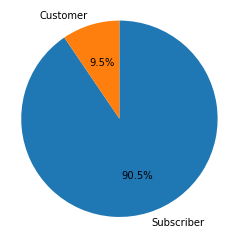

In [32]:
# plot a pie chart of user type
sorted_counts = bike['user_type'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, autopct='%1.1f%%');

plt.axis('square')

I can conclude that subscriber is greater than Customer having 90.5% of the user type and customer having just 9.5%

In [33]:
bike.member_gender.value_counts()

Male      128461
Female     40128
Other       3595
Name: member_gender, dtype: int64

In [34]:
# Function to plot Univariate Barplots with specified X-Label.
def funcbarplot(bike, x):
    mg=bike.groupby(x).size()
    plt.figure(figsize = (8,4))
    sb.barplot(x = mg.index, y = mg.values)
    plt.title(f"{x}" , y = 1.05, fontsize = 14, fontweight = 'bold')
    plt.xlabel(f'{x} Type')
    plt.ylabel('Number of Members')
    plt.show()

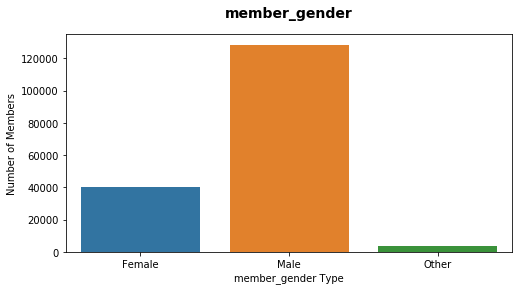

In [35]:
funcbarplot(bike,'member_gender')

Above BarPlot indicate,
  * "Male" users dominate in number, with a total of 128546.
  * "Female" users fall 2nd in count ratio, with a total number of 40128.
  *  Users of "Other" gender type are least in number. Their total number of 3595 users.

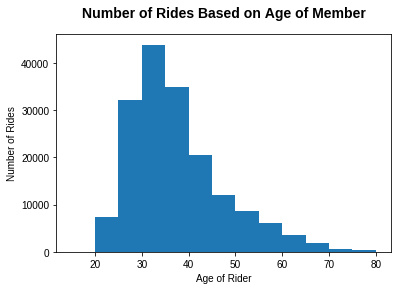

In [36]:
#Visualizing the data in a histogram
age_bins = np.arange(15, 80+5, 5)
plt.hist(data = bike, x = 'member_age', bins = age_bins);
plt.style.use('seaborn')
plt.title('Number of Rides Based on Age of Member', y = 1.05, fontsize = 14, fontweight = 'bold');
plt.xlabel('Age of Rider');
plt.ylabel('Number of Rides');

Above histogram clearly shows, 
  * People of age '18' to '50', comprise most of our Users.
  * We see clear fall in user count as their Age progress.

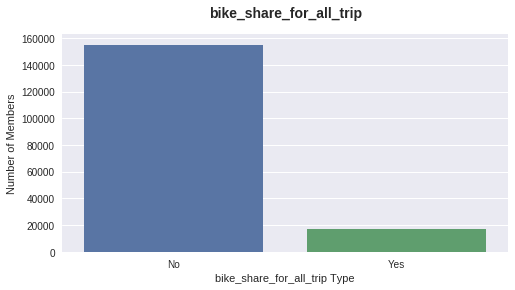

In [37]:
#BarPlot representing member gender ratio
funcbarplot(bike,'bike_share_for_all_trip')

I concluded that majority of our users do not prefer sharing their rides.

In [38]:
# there are 329 start stations. 
print(len(bike['start_station_name'].value_counts()))
bike['start_station_name'].value_counts()

329


Market St at 10th St                                               3588
San Francisco Caltrain Station 2  (Townsend St at 4th St)          3316
Berry St at 4th St                                                 2882
Montgomery St BART Station (Market St at 2nd St)                   2674
Powell St BART Station (Market St at 4th St)                       2592
San Francisco Caltrain (Townsend St at 4th St)                     2519
San Francisco Ferry Building (Harry Bridges Plaza)                 2490
Howard St at Beale St                                              2166
Steuart St at Market St                                            2146
Powell St BART Station (Market St at 5th St)                       2112
The Embarcadero at Sansome St                                      1945
Bancroft Way at Telegraph Ave                                      1751
Bancroft Way at College Ave                                        1700
2nd St at Townsend St                                           

In [39]:
# Subset the dataset by keeping only top 10 locations with high traffics, bike_top10. 
locs = ['Market St at 10th St','San Francisco Caltrain Station 2  (Townsend St at 4th St)','Berry St at 4th St','Montgomery St BART Station (Market St at 2nd St)', 'Powell St BART Station (Market St at 4th St)','San Francisco Caltrain (Townsend St at 4th St)','San Francisco Ferry Building (Harry Bridges Plaza)','Howard St at Beale St','Steuart St at Market St','Powell St BART Station (Market St at 5th St)']

bike_top10 = bike.loc[bike['start_station_name'].isin(locs)]

In [40]:
# Test and see if only the top 10 station is show
bike_top10['start_station_name'].value_counts()

Market St at 10th St                                         3588
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3316
Berry St at 4th St                                           2882
Montgomery St BART Station (Market St at 2nd St)             2674
Powell St BART Station (Market St at 4th St)                 2592
San Francisco Caltrain (Townsend St at 4th St)               2519
San Francisco Ferry Building (Harry Bridges Plaza)           2490
Howard St at Beale St                                        2166
Steuart St at Market St                                      2146
Powell St BART Station (Market St at 5th St)                 2112
Name: start_station_name, dtype: int64

In [41]:
# After subsetting top 10 station with the most trip, I create a countplot to see the distribution and order from top 1 to top 10
start_counts = bike_top10['start_station_name'].value_counts()
start_order = start_counts.index

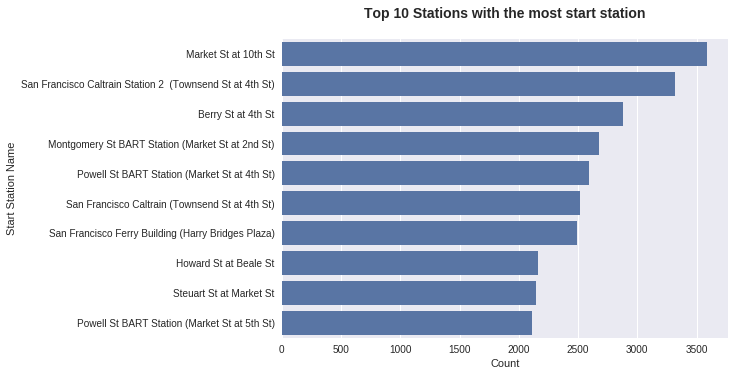

In [42]:
base_color = sb.color_palette()[0]
sb.countplot(data=bike_top10, y='start_station_name', color=base_color, order=start_order)
plt.xlabel('Count')
plt.ylabel('Start Station Name')
plt.title('Top 10 Stations with the most start station', y = 1.05, fontsize = 14, fontweight = 'bold');

After checking start stations, Market St at 10th St is rank first where users start their trip.


In [43]:
# convert time period, month, and weekday into ordered categorical types
ordinal_var_dict = {'period_day': ['morning', 'afternoon', 'night'],
                    'start_day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    bike[var] = bike[var].astype(ordered_var)

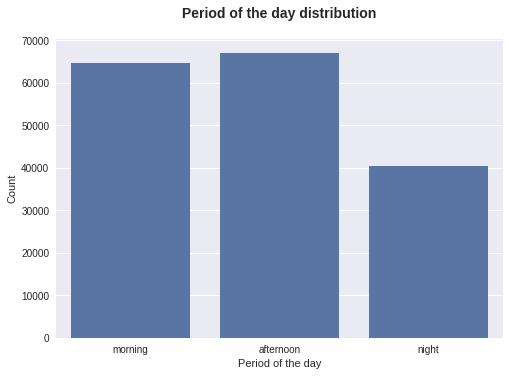

In [44]:
# Period of the day
base_color = sb.color_palette()[0]
sb.countplot(data=bike, x='period_day', color=base_color)
plt.xlabel('Period of the day')
plt.ylabel('Count')
plt.title('Period of the day distribution', y = 1.05, fontsize = 14, fontweight = 'bold');

Above bar chart clearly shows: Most trips commences at the afternoon then follow by morning but fewer at night

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
I firstly checked the riders characteristics. The characteristics I checked was user type, gender, age, location, willingness to share their rides and perid of the day they likes making the ride. There is no unsual points. I have to change period_day and start day into ordered categorical type.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
All the tidiness, quality issues have been addressed to the data wrangling process simutaneously. Except, I have to change period_day and start day into ordered categorical type.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

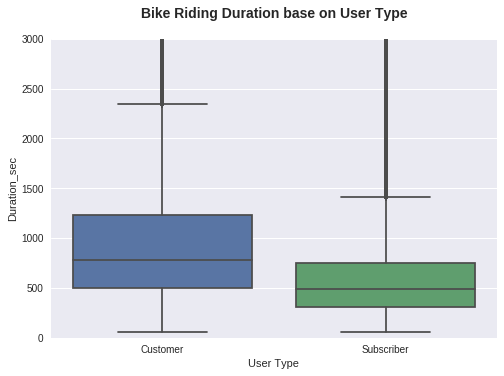

In [45]:
# plot using box plot showing duration of the user type
sb.boxplot(data=bike, x='user_type', y='duration_sec')
plt.ylim(0,3000)
plt.title("Bike Riding Duration base on User Type", y = 1.05, fontsize = 14, fontweight = 'bold')
plt.xlabel('User Type')
plt.ylabel('Duration_sec')
plt.show()

It is very interesting to see that Customers tend to travel for longer durations and Subscribers travel for comparatively less duration. 

In [46]:
bike.user_type.value_counts()

Subscriber    155838
Customer       16346
Name: user_type, dtype: int64

In [47]:
bike.start_day.value_counts()

Thursday     33712
Tuesday      30584
Wednesday    28426
Monday       25641
Friday       24895
Sunday       14512
Saturday     14414
Name: start_day, dtype: int64

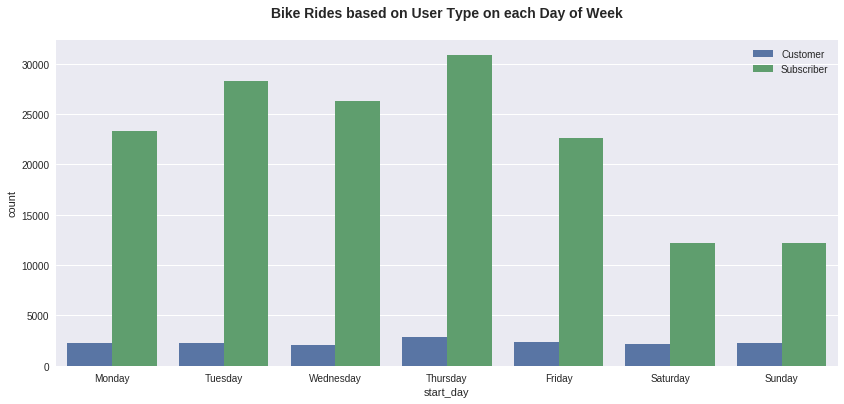

In [48]:
# Distribution of bike rides based on user type on each day of week
plt.figure(figsize=[14,6])
sb.countplot(data = bike, x='start_day', hue='user_type')
plt.title('Bike Rides based on User Type on each Day of Week', y = 1.05, fontsize = 14, fontweight = 'bold')
plt.legend()
plt.show()

From the above chart, I can conclude that customer has the almost the same frquency but subscriber varies.
Also, I deduce that subsriber rides more in weekdays compare to weekend.

In [49]:
# Prepare lists of categorical variables
users_chr = ['user_type','member_gender']

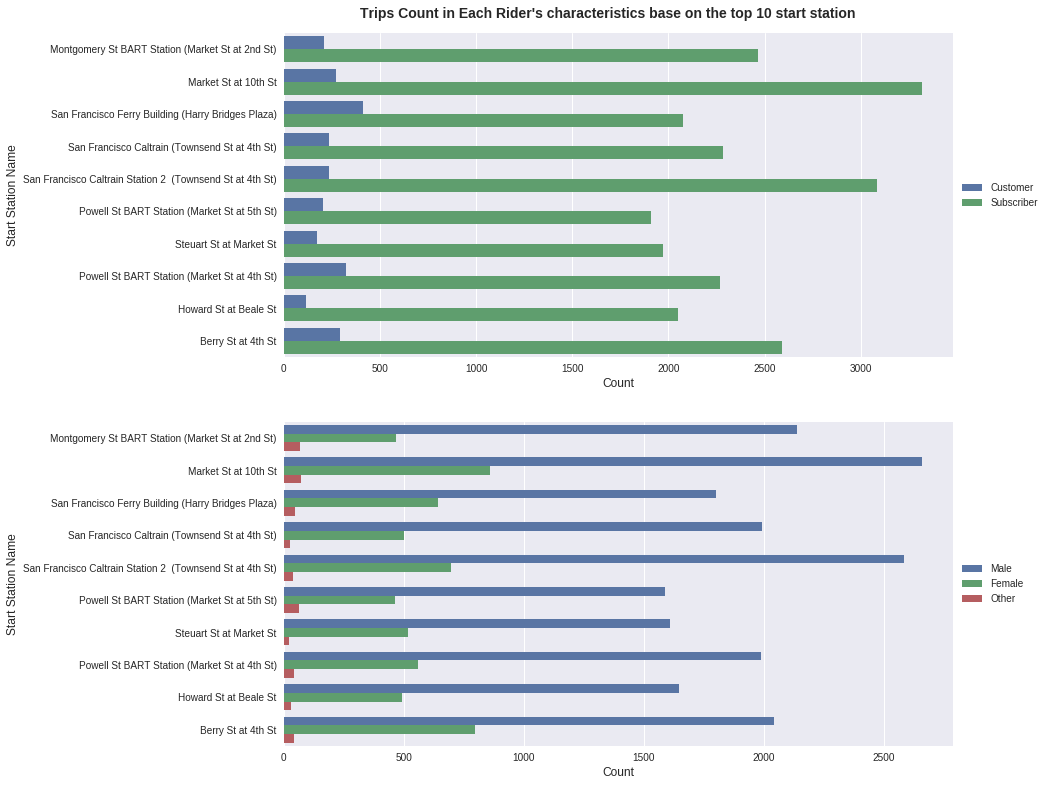

In [50]:
# Categorical variables by plotting countplot: top 10 stations by users' attributes (user_type, member's gender)
fig = plt.figure(figsize=(12,12))
plt.subplots_adjust(top=0.95)
fig.suptitle('Trips Count in Each Rider\'s characteristics base on the top 10 start station', fontsize = 14, fontweight = 'bold')
for i in range(1, 3):
    ax = fig.add_subplot(2, 1, i)
    sb.countplot(data=bike_top10, y='start_station_name', hue=users_chr[i-1])
    plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
    plt.ylabel('Start Station Name', fontsize = 12)
    plt.xlabel('Count', fontsize = 12);

After breaking down into top 10 start station by users' characteristics.   
1. Apparently, subscribers are more than customers in each station.
2. The trips in male riders are way more than in females.

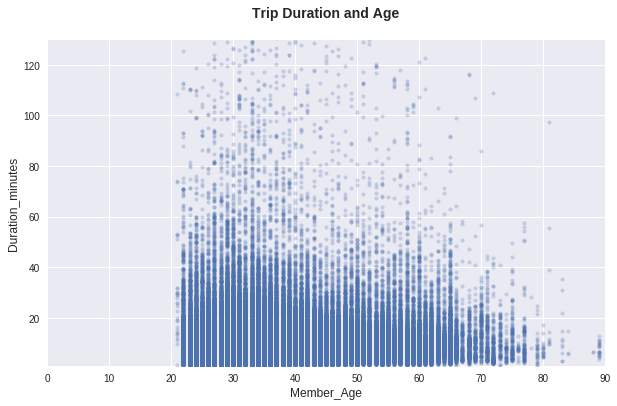

In [51]:
# plot duaration_minutes against member age to see their relationship
plt.figure(figsize=[10,6])
plt.scatter(bike['member_age'], bike['duration_minutes'], alpha = 0.25, marker = '.' )
plt.axis([0, 90, 1, 130])
plt.title('Trip Duration and Age', y = 1.05, fontsize = 14, fontweight = 'bold')
plt.xlabel('Member_Age', fontsize = 12)
plt.ylabel('Duration_minutes',fontsize =12)
plt.show()

The age bracket from 20 to 40 has a ranging of trip duration of 5 to 30 minutes and the trip duration narrowing as the age increased

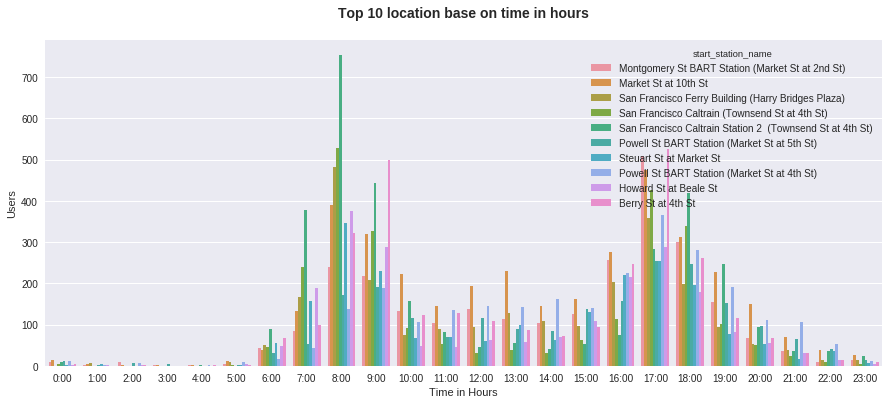

In [52]:
# ploting top 10 location base on time in hours
start = bike_top10['start_station_name'].value_counts().index[:4]
s_stations = bike_top10.loc[bike_top10['start_station_name'].isin(start)]
plt.figure(figsize = (15,6))
sb.countplot(data=bike_top10, x='start_hour', hue='start_station_name')
x_tick= np.arange(0,24,1)
x_label= [str(x)+":00" for x in x_tick]
plt.xticks(x_tick, x_label)
plt.xlabel('Time in Hours')
plt.ylabel('Users')
plt.title('Top 10 location base on time in hours', y = 1.05, fontsize = 14, fontweight = 'bold')
plt.show()

The graph shows that the bigger number of users prefer to ride bike in the morning at 8 am.
Also, people in San Francisco Caltrain Station 2 (Townsend St at 4th St) start most of the rides at 8 am.

Text(0.5,0,'Duration of bike trips')

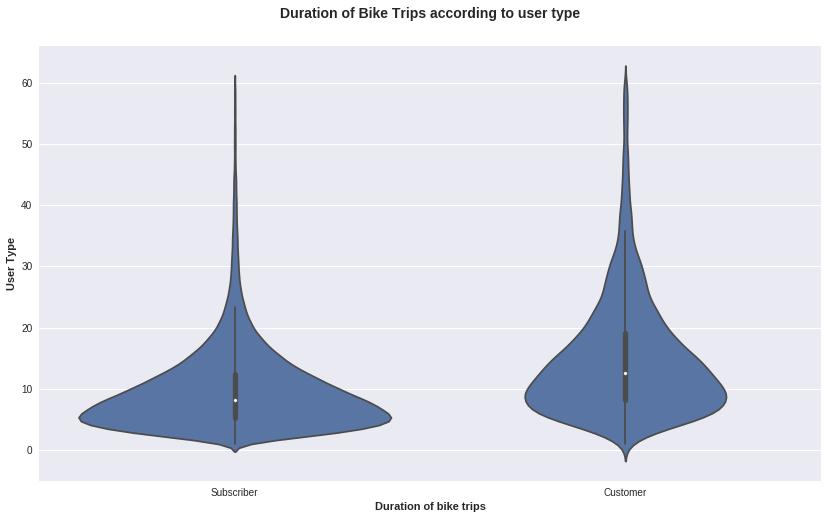

In [53]:
# Does trip duration depend on user type
plt.figure(figsize = [14,8])
sb.violinplot(data = bike.query("duration_minutes <=60"), x = 'user_type', y='duration_minutes', color = sb.color_palette()[0])
plt.title('Duration of Bike Trips according to user type', y = 1.05, fontsize = 14, fontweight = 'bold')
plt.ylabel('User Type', fontweight = 'bold')
plt.xlabel('Duration of bike trips', fontweight='bold')

At durations less than or equals to 60 minutes , both customers and subscribers have achieved similar durations of use.

Text(0.5,1.05,'Member gender vs duration')

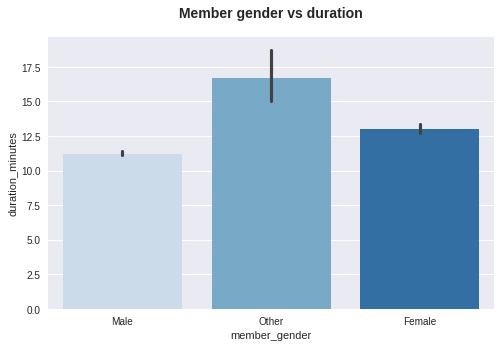

In [54]:
# plot using bar chart showing duration_minutes of the each gender
plt.figure(figsize = [8, 5])
sb.barplot(x='member_gender',y='duration_minutes',data=bike,palette='Blues').set_title('Member gender vs duration', y = 1.05, fontsize = 14, fontweight = 'bold')

Very interesting to see that average duration per minutes of female is higher than the male that are more than female in the trip.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
In continuation with riders characteristics. I observed the following observation
> Customers tend to travel for longer durations. Subscribers travel for comparatively less duration.

> At durations less than or equals to 60 minutes, both customers and subscribers have achieved similar durations of use.

> The "other" gender has the least values but with higher durations so they could be considered at outliers


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Duration per minutes for both gender and user type reaveal that customer have more duration per minutes than subscriber that have more members and also female having more duration per minutes than male.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

> I want to explore how the two categoties of user type and member gender are related to the trip duration and member age

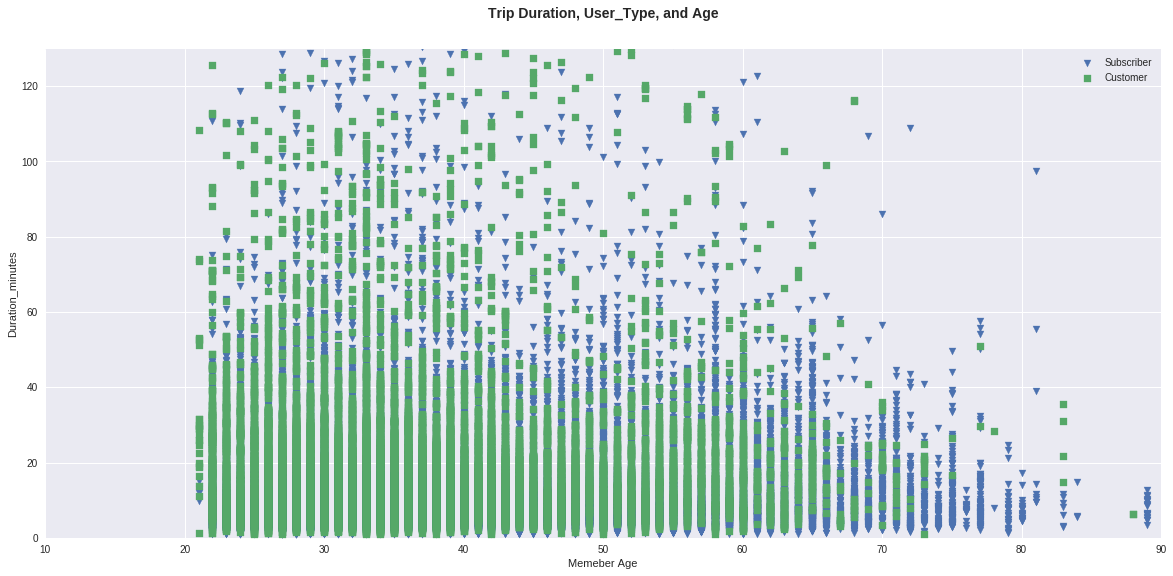

In [55]:

plt.figure(figsize=[20,9])
usertype_mark = [['Subscriber', 'v'],['Customer', 's']]

for user_type, marker in usertype_mark:
    bike_usertype = bike[bike['user_type'] == user_type]
    plt.scatter(bike_usertype['member_age'], bike_usertype['duration_minutes'], marker = marker, alpha= 1)
plt.legend(['Subscriber','Customer'])
plt.axis([10, 90, 0, 130 ])
plt.title('Trip Duration, User_Type, and Age', y = 1.05, fontsize = 14, fontweight = 'bold')
plt.xlabel('Memeber Age')
plt.ylabel('Duration_minutes')
plt.show()

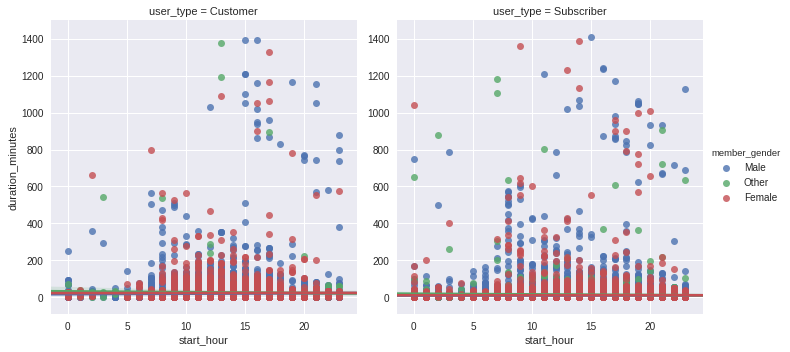

In [56]:
sb.lmplot(data=bike, x="start_hour", y="duration_minutes", hue="member_gender",
           col="user_type")

This plot indicates that women ride for longer periods than men whether customer or subscriber. I also note that there is an even distribution of genders between the 2 user types subscribers and customers.

In [57]:
bike.to_csv("fordbike.csv")

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
> subcribers has more age range than customer and it is not suprising becausing they have more values.

> There is little or no difference between theh the distribution of customers and subscribers.

> Female ride for longer periods than men whether as a customer or subscriber.

### Were there any interesting or surprising interactions between features?

> The interesting results is shown by the plot is that the subscribers users are using the bikeshare system for longer duration and also covering higher age range, which shows good relationship between the clients and the bikeshare company.

# Conclusion
<a id='conclusions'></a>

From this analysis, we can observe a few points regarding GoBike users: 
<ul>
<li>First, bike riding patterns are different on weekdays than on weekends, where on weekdays GoBike users are most frequent during the early morning hours of 8 AM.
<li>Second, when analyzing the days of week, there is a much higher frequency of bike rides on weekdays than on weekends, with Thursdays having the highest frequency of bike rides than any other day.
<li>Thirdly, the rider characteristics shows that there are more male riders than female riders, more subscriber than customer, most riders say no to bike sharing.
<li> Also, Further findings shows that female rides longer than male, customers rides longer than subscribers
<li>In conclusion, it is recommended to reduce the number of regular customers using GoBike systems or converting them to subscribers, in order to reduce ride durations, and increase turnover of bikes when they are most needed.</ul>



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!



## Limitations

There are some limiations in this dataset, including but not limited to:
<ul>
<li>This dataset only includes bike rides during one month, comparing bike rides throughout the year could lead to interesting results.
<li>The dataset includes bike rides only in San Franscisco. San Franscisco is a generally variable landscape in terms of topography and has some high slopes to navigate. It would be interesting to compare bike riding patterns in different cities.
</ul>